In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, r2_score, mean_absolute_error

import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import sklearn
from sklearn.tree import export_graphviz
import graphviz
from collections import Counter

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler_min_max = MinMaxScaler(feature_range=(0, 1))

from IPython.display import Image
from scipy.stats import norm
from scipy.signal import argrelextrema

pd.set_option('display.max_columns', None)

In [265]:
prices = pd.read_csv("useful_data/round_2_day_1_joined_table.csv")
prices.rename(columns={prices.columns[0]: 'timestamp'}, inplace=True)
prices

,timestamp,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,total_ask_vol,total_bid_vol,ask_vwap,bid_vwap,spread
0,0,1094.0,10.0,1093.0,3.0,1086.0,41.0,1102.0,10.0,1104.0,3.0,1111.0,41.0,1098.0,0.000000,1098.25,0.9,10.5,-5.0,2100.0000,70.000000,1,54.0,54.0,1108.944444,1087.870370,8.0
1,100,1094.0,6.0,1093.0,2.0,1087.0,51.0,1102.0,6.0,1103.0,2.0,1110.0,51.0,1098.0,0.000000,1098.25,0.9,9.5,-5.0,2099.7570,70.022710,1,59.0,59.0,1108.949153,1087.915254,8.0
2,200,1093.0,6.0,1092.0,3.0,1085.0,49.0,1101.0,6.0,1102.0,3.0,1108.0,49.0,1097.0,109600.000000,1096.75,0.9,9.5,-5.0,2099.5132,70.045395,1,58.0,58.0,1106.965517,1086.189655,8.0
3,300,1093.0,10.0,1092.0,4.0,1085.0,52.0,1101.0,10.0,1102.0,4.0,1109.0,52.0,1097.0,109600.000000,1097.00,0.9,9.5,-5.0,2099.2683,70.068030,1,66.0,66.0,1107.363636,1086.636364,8.0
4,400,1093.0,10.0,1092.0,3.0,1086.0,51.0,1101.0,10.0,1102.0,3.0,1109.0,51.0,1097.0,109600.000000,1097.25,0.9,9.5,-5.0,2099.0225,70.090640,1,64.0,64.0,1107.421875,1087.375000,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,99500,1067.0,5.0,1066.0,4.0,1060.0,43.0,1074.0,5.0,1075.0,4.0,1082.0,43.0,1070.5,111088.679688,1070.75,1.1,8.5,-5.5,1701.2242,84.906700,1,52.0,52.0,1080.692308,1061.134615,7.0
996,99600,1068.0,7.0,1067.0,2.0,1061.0,46.0,1075.0,7.0,1076.0,2.0,1083.0,46.0,1071.5,111088.679688,1071.75,1.1,8.5,-5.5,1700.9775,84.925300,1,55.0,55.0,1081.727273,1062.109091,7.0
997,99700,1068.0,5.0,1067.0,3.0,1061.0,48.0,1076.0,5.0,1077.0,3.0,1083.0,48.0,1072.0,111088.679688,1072.00,1.1,8.5,-5.5,1700.7317,84.943930,1,56.0,56.0,1082.053571,1061.946429,8.0
998,99800,1068.0,8.0,1067.0,3.0,1061.0,49.0,1075.0,8.0,1076.0,3.0,1083.0,49.0,1071.5,111088.679688,1071.75,1.1,8.5,-5.5,1700.4869,84.962590,1,60.0,60.0,1081.583333,1062.233333,7.0


In [266]:
prices_neg1 = pd.read_csv("../../data2024/round-2-island-data-bottle/prices_round_2_day_-1.csv", sep=";")

day = prices_neg1.columns[-1]
new_order = [day] + [col for col in prices_neg1.columns if col != day] 
prices_neg1 = prices_neg1[new_order]

prices_columns_to_convert = ['day', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_neg1[col] = pd.to_numeric(prices_neg1[col], errors='coerce')
    
prices_0 = pd.read_csv("../../data2024/round-2-island-data-bottle/prices_round_2_day_0.csv", sep=";")

day = prices_0.columns[-1]
new_order = [day] + [col for col in prices_0.columns if col != day] 
prices_0 = prices_0[new_order]

prices_columns_to_convert = ['day', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_0[col] = pd.to_numeric(prices_0[col], errors='coerce')

prices_pos1 = pd.read_csv("../../data2024/round-2-island-data-bottle/prices_round_2_day_1.csv", sep=";")

day = prices_pos1.columns[-1]
new_order = [day] + [col for col in prices_pos1.columns if col != day] 
prices_pos1 = prices_pos1[new_order]

prices_columns_to_convert = ['day', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_pos1[col] = pd.to_numeric(prices_pos1[col], errors='coerce')

orchids = pd.concat([prices_neg1, prices_0, prices_pos1], ignore_index=True)
orchids['new_timestamp'] = orchids['timestamp']
orchids.loc[10001:, 'new_timestamp'] += 1000100
orchids.loc[20002:, 'new_timestamp'] += 1000100
orchids

,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp
0,-1,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,0
1,-1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,100
2,-1,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,200
3,-1,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,300
4,-1,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,400
...,...,...,...,...,...,...,...,...,...
29998,1,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,2999800
29999,1,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,2999900
30000,1,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,3000000
30001,1,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,3000100


In [ ]:
def plot_orchids_sunlight_humidity(df):
    fig, axs = plt.subplots(5, 1, sharex=True, figsize=(16, 12), gridspec_kw={'height_ratios': [3, 1, 1, 1, 1]})
    
    # Plot ORCHIDS vs new_timestamp
    axs[0].plot(df['new_timestamp'], df['ORCHIDS'], label='ORCHIDS')
    axs[0].set_title('ORCHIDS')
    
    # Plot SUNLIGHT vs new_timestamp
    axs[1].plot(df['new_timestamp'], df['SUNLIGHT'], label='SUNLIGHT')
    axs[1].set_title('SUNLIGHT')
    
    # Plot HUMIDITY vs new_timestamp
    axs[2].plot(df['new_timestamp'], df['HUMIDITY'], label='HUMIDITY')
    axs[2].set_title('HUMIDITY')
    # Highlighting region between 60 and 80 for HUMIDITY
    axs[2].fill_between(df['new_timestamp'], 60, 80, where=(df['HUMIDITY'] >= 60) & (df['HUMIDITY'] <= 80), color='gray', alpha=0.5, label='Target Humidity Zone')
    
    # Plot cum_sun vs new_timestamp
    axs[3].plot(df['new_timestamp'], df['alter_cum_sun'], label='alter_cum_sun')
    axs[3].set_title('alter_cum_sun')
    axs[4].plot(df['new_timestamp'], df['alt_cum_sun'], label='alt_cum_sun')
    axs[4].set_title('alt_cum_sun')
    
    # Add vertical lines at timestamps to signify day for all plots
    for ax in axs:
        ax.axvline(0, color='blue', linestyle='--', label='Day -1')
        ax.axvline(1000100, color='green', linestyle='--', label='Day 0')
        ax.axvline(2000200, color='blue', linestyle='--', label='Day 1')
    
    # Red lines for thresholds
    axs[1].axhline(2500, color='red', linestyle='--', label='Sunlight Threshold')
    axs[2].axhline(60, color='red', linestyle='--')
    axs[2].axhline(80, color='red', linestyle='--')
    axs[3].axhline(7/12*10000, color='red', linestyle='--', label='Cum Sun Threshold')
    axs[4].axhline(7/12*2500, color='red', linestyle='--')

    axs[-1].set_xlabel('Timestamp')
    
    plt.tight_layout()
    plt.legend()
    plt.show()

plot_orchids_sunlight_humidity(orchids)

In [ ]:
target_humidity_df = orchids[(orchids['HUMIDITY'] >= 60) & (orchids['HUMIDITY'] <= 80) & (orchids['day'] == -1) & (orchids['timestamp'] > 745000)].reset_index()
target_humidity_df.head(50)

In [310]:
orchids['cum_sun'] = orchids.groupby('day')['SUNLIGHT'].cumsum() / 10000 # ok
orchids['remain_sun'] = (2500 * 7 / 12 - np.minimum(orchids['cum_sun'], 2500 * 7 / 12)) * 12 / 7 # alt is better
orchids['alt_sun'] = np.where(orchids['SUNLIGHT'] >= 2500, orchids['SUNLIGHT'], 0) # overpowers SUNLIGHT sometimes
orchids['alt_cum_sun'] = orchids.groupby('day')['alt_sun'].cumsum() / 10000 # no
orchids['alt_remain_sun'] = (2500 * 7 / 12 - np.minimum(orchids['alt_cum_sun'], 2500 * 7 / 12)) * 12 / 7 # yes
orchids['alter_sun'] = np.where(orchids['SUNLIGHT'] >= 2500, 1, 0) # no
orchids['alter_cum_sun'] = orchids.groupby('day')['alter_sun'].cumsum() #no
orchids['alter_remain_sun'] = (7 / 12 * 10000 - np.minimum(orchids['alter_cum_sun'], 7 / 12 * 10000)) * 12 / 7 / 10000 # alter is garbage
orchids['sun_change'] = orchids['SUNLIGHT'].pct_change() * 100 # yes
orchids['sun_diff'] = orchids['SUNLIGHT'].diff()
orchids['sun_delta'] = orchids['SUNLIGHT'].pct_change() * 100 + 100
orchids['sun_gamma'] = (orchids['sun_delta']).pct_change(fill_method=None) * 100 # this is wrong


orchids['hum_diff'] = (orchids['HUMIDITY'] - 70).abs() # keep
orchids['alt_hum_diff'] = np.maximum((orchids['HUMIDITY'] - 70).abs() - 10, 0) # not as good
orchids['hum_change'] = orchids['HUMIDITY'].pct_change() * 100
orchids['alt_hum_change'] = np.where(orchids['alt_hum_diff'] == 0, orchids['hum_change'], 0)
orchids['hum_avg'] = orchids.groupby('day')['HUMIDITY'].expanding().mean().reset_index(level=0, drop=True)
orchids['hum_log'] = np.log(orchids['hum_diff']+1e9)
orchids['alt_hum_log'] = np.log(orchids['alt_hum_diff']+1e9)
orchids['roll_hum_avg'] = orchids.groupby('day')['HUMIDITY'].transform(lambda x: x.rolling(window=70, min_periods=1).mean())
orchids['high_low_humidity'] = ((orchids['HUMIDITY'] < 60) | (orchids['HUMIDITY'] > 80)).astype(int)
orchids['mid_humidity'] = ((orchids['HUMIDITY'] >= 60) | (orchids['HUMIDITY'] <= 80)).astype(int)
orchids['hum_change_hl'] = 0

orchids['tte'] = (10000000 - orchids['timestamp']) / 10000
orchids['orchid_diff'] = orchids['ORCHIDS'].diff()
orchids['orchid_shift'] = orchids.groupby('day')['ORCHIDS'].shift(1)
orchids['orchid_log'] = np.log(orchids['ORCHIDS'])

# try out logs?
# rolling avreages

orchids['orchid_sun'] = orchids['orchid_diff'] / orchids['SUNLIGHT'].diff()
orchids['orchid_hum'] = orchids['orchid_diff'] / orchids['HUMIDITY'].diff()

features = ['TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY', 'cum_sun', 'remain_sun', 'hum_diff']
features_hl_hum = ['sun_change', 'hum_avg', 'hum_diff', 'SUNLIGHT', 'alt_remain_sun', 'hum_change', 'alt_hum_change', 'sun_diff',
                        'alt_cum_sun', 'alt_hum_diff', 'hum_log', 'alt_hum_log', 'roll_hum_avg']
features_mid_hum = ['sun_change', 'hum_avg', 'hum_diff', 'SUNLIGHT', 'alt_remain_sun', 'hum_change', 'alt_hum_change', 'sun_diff',
                        'alt_cum_sun', 'alt_hum_diff', 'hum_log', 'alt_hum_log', 'roll_hum_avg']
orchids[orchids['alt_hum_diff']>0]

,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp,cum_sun,remain_sun,alt_sun,alt_cum_sun,alt_remain_sun,alter_sun,alter_cum_sun,alter_remain_sun,sun_change,sun_diff,sun_delta,sun_gamma,hum_diff,alt_hum_diff,hum_change,alt_hum_change,hum_avg,hum_log,alt_hum_log,roll_hum_avg,tte,orchid_diff,orchid_shift,orchid_log,high_low_humidity,mid_humidity,hum_change_hl,orchid_sun,orchid_hum
177,-1,17700,1215.50,1.3,9.5,-2.2,2486.7410,80.006966,17700,44.129300,2424.349771,0.0,0.25,2499.571429,0,1,0.999829,0.015380,0.3824,100.015380,0.000199,10.006966,0.006966,0.008958,0.0,79.458149,20.723266,20.723266,79.772096,998.23,-0.25,1215.75,7.102911,1,1,0,-0.653766,-34.886966
178,-1,17800,1215.75,1.4,9.5,-2.2,2487.1277,80.014150,17800,44.378013,2423.923406,0.0,0.25,2499.571429,0,1,0.999829,0.015550,0.3867,100.015550,0.000171,10.014150,0.014150,0.008979,0.0,79.461255,20.723266,20.723266,79.778728,998.22,0.25,1215.50,7.103116,1,1,0,0.646496,34.799555
179,-1,17900,1214.75,1.4,9.5,-2.2,2487.5193,80.021350,17900,44.626765,2423.496974,0.0,0.25,2499.571429,0,1,0.999829,0.015745,0.3916,100.015745,0.000195,10.021350,0.021350,0.008998,0.0,79.464367,20.723266,20.723266,79.785376,998.21,-1.00,1215.75,7.102294,1,1,0,-2.553626,-138.888889
180,-1,18000,1213.25,1.4,9.5,-2.2,2487.9153,80.028564,18000,44.875556,2423.070475,0.0,0.25,2499.571429,0,1,0.999829,0.015919,0.3960,100.015919,0.000174,10.028564,0.028564,0.009015,0.0,79.467484,20.723266,20.723266,79.792041,998.20,-1.50,1214.75,7.101058,1,1,0,-3.787879,-207.929027
181,-1,18100,1211.75,1.4,9.5,-2.2,2488.3160,80.035790,18100,45.124388,2422.643906,0.0,0.25,2499.571429,0,1,0.999829,0.016106,0.4007,100.016106,0.000186,10.035790,0.035790,0.009029,0.0,79.470606,20.723266,20.723266,79.798721,998.19,-1.50,1213.25,7.099821,1,1,0,-3.743449,-207.583725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22997,1,299500,1052.75,0.8,8.5,-4.5,2297.4685,80.094950,2299700,572.506849,1518.559688,0.0,0.00,2500.000000,0,0,1.000000,0.021946,0.5041,100.021946,0.000026,10.094950,0.094950,-0.023749,0.0,86.963775,20.723266,20.723266,80.759657,970.05,-0.50,1053.25,6.959161,1,1,0,-0.991867,26.279828
22998,1,299600,1052.75,0.8,8.5,-4.5,2297.9734,80.075935,2299800,572.736646,1518.165750,0.0,0.00,2500.000000,0,0,1.000000,0.021976,0.5049,100.021976,0.000030,10.075935,0.075935,-0.023741,0.0,86.961477,20.723266,20.723266,80.740283,970.04,0.00,1052.75,6.959161,1,1,0,0.000000,-0.000000
22999,1,299700,1052.75,0.8,8.5,-4.5,2298.4790,80.056940,2299900,572.966494,1517.771725,0.0,0.00,2500.000000,0,0,1.000000,0.022002,0.5056,100.022002,0.000026,10.056940,0.056940,-0.023721,0.0,86.959174,20.723266,20.723266,80.720919,970.03,0.00,1052.75,6.959161,1,1,0,0.000000,-0.000000
23000,1,299800,1052.75,0.8,8.5,-4.5,2298.9854,80.037950,2300000,573.196393,1517.377613,0.0,0.00,2500.000000,0,0,1.000000,0.022032,0.5064,100.022032,0.000030,10.037950,0.037950,-0.023721,0.0,86.956866,20.723266,20.723266,80.701565,970.02,0.00,1052.75,6.959161,1,1,0,0.000000,-0.000000


In [311]:
orchids_cleaned = orchids[(orchids['hum_diff'] <= 10)].dropna().copy() # 
X = orchids_cleaned[features_mid_hum].copy()
y = orchids_cleaned['orchid_shift']
orchids_cleaned

,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp,cum_sun,remain_sun,alt_sun,alt_cum_sun,alt_remain_sun,alter_sun,alter_cum_sun,alter_remain_sun,sun_change,sun_diff,sun_delta,sun_gamma,hum_diff,alt_hum_diff,hum_change,alt_hum_change,hum_avg,hum_log,alt_hum_log,roll_hum_avg,tte,orchid_diff,orchid_shift,orchid_log,high_low_humidity,mid_humidity,hum_change_hl,orchid_sun,orchid_hum
2,-1,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,200,0.749827,2498.714583,0.0,0.250000,2499.571429,0,1,0.999829,-0.022965,-0.5740,99.977035,0.000247,9.00821,0.0,0.005202,0.005202,79.004103,20.723266,20.723266,79.004103,999.98,0.0,1201.75,7.091534,0,1,0,-0.000000,0.000000
3,-1,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,300,0.999654,2498.286307,0.0,0.250000,2499.571429,0,1,0.999829,-0.022718,-0.5677,99.977282,0.000247,9.01234,0.0,0.005227,0.005227,79.006163,20.723266,20.723266,79.006163,999.97,0.0,1201.75,7.091534,0,1,0,-0.000000,0.000000
4,-1,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,400,1.249426,2497.858127,0.0,0.250000,2499.571429,0,1,0.999829,-0.022471,-0.5614,99.977529,0.000247,9.01649,0.0,0.005252,0.005252,79.008228,20.723266,20.723266,79.008228,999.96,0.0,1201.75,7.091534,0,1,0,-0.000000,0.000000
5,-1,500,1200.25,1.5,9.5,-2.0,2497.1614,79.02066,500,1.499142,2497.430042,0.0,0.250000,2499.571429,0,1,0.999829,-0.022228,-0.5552,99.977772,0.000243,9.02066,0.0,0.005277,0.005277,79.010300,20.723266,20.723266,79.010300,999.95,-1.5,1201.75,7.090285,0,1,0,2.701729,-359.712230
6,-1,600,1201.75,1.5,9.5,-2.0,2496.6125,79.02485,600,1.748803,2497.002051,0.0,0.250000,2499.571429,0,1,0.999829,-0.021981,-0.5489,99.978019,0.000247,9.02485,0.0,0.005302,0.005302,79.012379,20.723266,20.723266,79.012379,999.94,1.5,1200.25,7.091534,0,1,0,-2.732738,357.995227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29998,1,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,2999800,2431.259584,0.000000,0.0,932.577378,901.295923,0,2775,0.524286,0.000461,0.0106,100.000461,0.000061,0.06451,0.0,0.022841,0.022841,77.565791,20.723266,20.723266,69.431221,900.04,-2.5,1038.75,6.943364,0,1,0,-235.849057,-156.543519
29999,1,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,2999900,2431.489579,0.000000,0.0,932.577378,901.295923,0,2775,0.524286,0.000522,0.0120,100.000522,0.000061,0.04847,0.0,0.022935,0.022935,77.565029,20.723266,20.723266,69.445203,900.03,0.0,1036.25,6.943364,0,1,0,0.000000,0.000000
30000,1,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,3000000,2431.719576,0.000000,0.0,932.577378,901.295923,0,2775,0.524286,0.000583,0.0134,100.000583,0.000061,0.03238,0.0,0.023002,0.023002,77.564270,20.723266,20.723266,69.459244,900.02,0.0,1036.25,6.943364,0,1,0,0.000000,0.000000
30001,1,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,3000100,2431.949575,0.000000,0.0,932.577378,901.295923,0,2775,0.524286,0.000652,0.0150,100.000652,0.000070,0.01622,0.0,0.023096,0.023096,77.563511,20.723266,20.723266,69.473344,900.01,-2.0,1036.25,6.941432,0,1,0,-133.333333,-123.762376


In [312]:
%%time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = X_train # scaler.fit_transform(X_train) # 
X_test_scaled = X_test # scaler.transform(X_test) # 

# Initialize the Linear Regression model
lin_reg = Lasso(alpha=0.1)

# Train the model
lin_reg.fit(X_train_scaled, y_train)

# Make predictions using the testing set
lin_pred = lin_reg.predict(X_test_scaled)

# Initialize the Random Forest Regressor
forest_reg = RandomForestRegressor(n_estimators=250, max_depth=4, min_samples_leaf=500, min_samples_split=1200, random_state=42)

# Train the model
forest_reg.fit(X_train_scaled, y_train)

# Make predictions using the testing set
forest_pred = forest_reg.predict(X_test_scaled)

CPU times: total: 8.69 s
Wall time: 8.66 s


In [313]:
# For Linear Regression
lin_r2 = r2_score(y_test, lin_pred)
lin_mse = mean_squared_error(y_test, lin_pred)
lin_mae = mean_absolute_error(y_test, lin_pred)

print(f"Linear Regression R2: {lin_r2}")
print(f"Linear Regression MSE: {lin_mse}")
print(f"Linear Regression MAE: {lin_mae}")

print("Coefficients (Betas):", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)

# For Random Forest Regressor
forest_r2 = r2_score(y_test, forest_pred)
forest_mse = mean_squared_error(y_test, forest_pred)
forest_mae = mean_absolute_error(y_test, forest_pred)

print(f"Random Forest R2: {forest_r2}")
print(f"Random Forest MSE: {forest_mse}")
print(f"Random Forest MAE: {forest_mae}")

Linear Regression R2: 0.6607225201919034
Linear Regression MSE: 861.0312851138287
Linear Regression MAE: 21.85435327395949
Coefficients (Betas): [ 0.00000000e+00  3.10237631e+00  1.18949872e+00  1.76240180e-03
  7.39714922e-02  0.00000000e+00  0.00000000e+00 -1.71646684e+01
  1.14961990e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.22355554e+00]
Intercept: 445.07864887224923
Random Forest R2: 0.7864917231907325
Random Forest MSE: 541.8494209150144
Random Forest MAE: 16.110857127381983


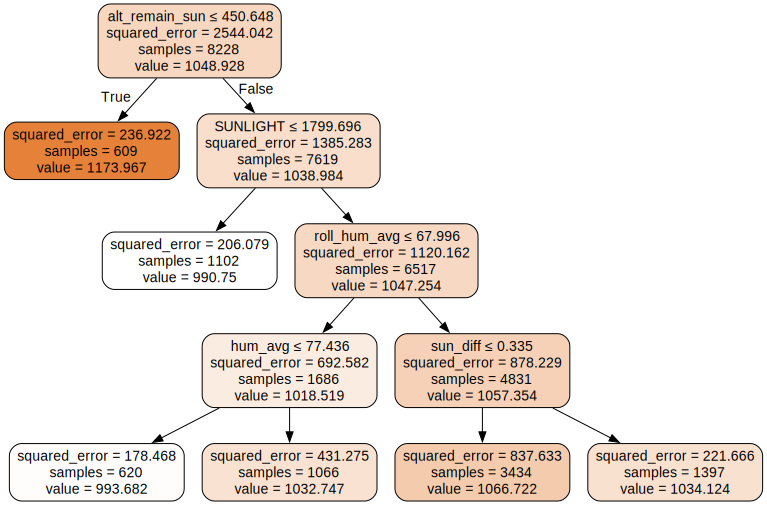

In [314]:
# Assuming 'forest_reg' is your trained Random Forest Regressor
# Visualize the first tree from the random forest
estimator = forest_reg.estimators_[0]

dot_data_rf = export_graphviz(estimator, out_file=None,
                              feature_names=X_train.columns,
                              class_names=['ORCHIDS'],
                              filled=True, rounded=True,
                              special_characters=True)
graph_rf = graphviz.Source(dot_data_rf)
graph_rf.render("random_forest_tree_lag")  # This saves the tree visualization to a file
graph_rf

In [315]:
orchids_cleaned1 = orchids[(orchids['hum_diff'] > 10)].dropna().copy() # 
X2 = orchids_cleaned1[features_hl_hum].copy()
y = orchids_cleaned1['orchid_shift']
orchids_cleaned1

,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp,cum_sun,remain_sun,alt_sun,alt_cum_sun,alt_remain_sun,alter_sun,alter_cum_sun,alter_remain_sun,sun_change,sun_diff,sun_delta,sun_gamma,hum_diff,alt_hum_diff,hum_change,alt_hum_change,hum_avg,hum_log,alt_hum_log,roll_hum_avg,tte,orchid_diff,orchid_shift,orchid_log,high_low_humidity,mid_humidity,hum_change_hl,orchid_sun,orchid_hum
177,-1,17700,1215.50,1.3,9.5,-2.2,2486.7410,80.006966,17700,44.129300,2424.349771,0.0,0.25,2499.571429,0,1,0.999829,0.015380,0.3824,100.015380,0.000199,10.006966,0.006966,0.008958,0.0,79.458149,20.723266,20.723266,79.772096,998.23,-0.25,1215.75,7.102911,1,1,0,-0.653766,-34.886966
178,-1,17800,1215.75,1.4,9.5,-2.2,2487.1277,80.014150,17800,44.378013,2423.923406,0.0,0.25,2499.571429,0,1,0.999829,0.015550,0.3867,100.015550,0.000171,10.014150,0.014150,0.008979,0.0,79.461255,20.723266,20.723266,79.778728,998.22,0.25,1215.50,7.103116,1,1,0,0.646496,34.799555
179,-1,17900,1214.75,1.4,9.5,-2.2,2487.5193,80.021350,17900,44.626765,2423.496974,0.0,0.25,2499.571429,0,1,0.999829,0.015745,0.3916,100.015745,0.000195,10.021350,0.021350,0.008998,0.0,79.464367,20.723266,20.723266,79.785376,998.21,-1.00,1215.75,7.102294,1,1,0,-2.553626,-138.888889
180,-1,18000,1213.25,1.4,9.5,-2.2,2487.9153,80.028564,18000,44.875556,2423.070475,0.0,0.25,2499.571429,0,1,0.999829,0.015919,0.3960,100.015919,0.000174,10.028564,0.028564,0.009015,0.0,79.467484,20.723266,20.723266,79.792041,998.20,-1.50,1214.75,7.101058,1,1,0,-3.787879,-207.929027
181,-1,18100,1211.75,1.4,9.5,-2.2,2488.3160,80.035790,18100,45.124388,2422.643906,0.0,0.25,2499.571429,0,1,0.999829,0.016106,0.4007,100.016106,0.000186,10.035790,0.035790,0.009029,0.0,79.470606,20.723266,20.723266,79.798721,998.19,-1.50,1213.25,7.099821,1,1,0,-3.743449,-207.583725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22997,1,299500,1052.75,0.8,8.5,-4.5,2297.4685,80.094950,2299700,572.506849,1518.559688,0.0,0.00,2500.000000,0,0,1.000000,0.021946,0.5041,100.021946,0.000026,10.094950,0.094950,-0.023749,0.0,86.963775,20.723266,20.723266,80.759657,970.05,-0.50,1053.25,6.959161,1,1,0,-0.991867,26.279828
22998,1,299600,1052.75,0.8,8.5,-4.5,2297.9734,80.075935,2299800,572.736646,1518.165750,0.0,0.00,2500.000000,0,0,1.000000,0.021976,0.5049,100.021976,0.000030,10.075935,0.075935,-0.023741,0.0,86.961477,20.723266,20.723266,80.740283,970.04,0.00,1052.75,6.959161,1,1,0,0.000000,-0.000000
22999,1,299700,1052.75,0.8,8.5,-4.5,2298.4790,80.056940,2299900,572.966494,1517.771725,0.0,0.00,2500.000000,0,0,1.000000,0.022002,0.5056,100.022002,0.000026,10.056940,0.056940,-0.023721,0.0,86.959174,20.723266,20.723266,80.720919,970.03,0.00,1052.75,6.959161,1,1,0,0.000000,-0.000000
23000,1,299800,1052.75,0.8,8.5,-4.5,2298.9854,80.037950,2300000,573.196393,1517.377613,0.0,0.00,2500.000000,0,0,1.000000,0.022032,0.5064,100.022032,0.000030,10.037950,0.037950,-0.023721,0.0,86.956866,20.723266,20.723266,80.701565,970.02,0.00,1052.75,6.959161,1,1,0,0.000000,-0.000000


In [316]:
%%time

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, y, test_size=0.2, random_state=42)

X_train_scaled1 = X_train1 # scaler.fit_transform(X_train) # 
X_test_scaled1 = X_test1 # scaler.transform(X_test) # 

# Initialize the Linear Regression model
lin_reg1 = Lasso(alpha=0.1, max_iter=10000)

# Train the model
lin_reg1.fit(X_train_scaled1, y_train1)

# Make predictions using the testing set
lin_pred1 = lin_reg1.predict(X_test_scaled1)

# Initialize the Random Forest Regressor
forest_reg1 = RandomForestRegressor(n_estimators=250, max_depth=4, min_samples_leaf=500, min_samples_split=1200, random_state=42)

# Train the model
forest_reg1.fit(X_train_scaled1, y_train1)

# Make predictions using the testing set
forest_pred1 = forest_reg1.predict(X_test_scaled1)

CPU times: total: 8.05 s
Wall time: 7.86 s


In [317]:
# For Linear Regression
lin_r2 = r2_score(y_test1, lin_pred1)
lin_mse = mean_squared_error(y_test1, lin_pred1)
lin_mae = mean_absolute_error(y_test1, lin_pred1)

print(f"Linear Regression R2: {lin_r2}")
print(f"Linear Regression MSE: {lin_mse}")
print(f"Linear Regression MAE: {lin_mae}")

print("Coefficients (Betas):", lin_reg1.coef_)
print("Intercept:", lin_reg1.intercept_)

# For Random Forest Regressor
forest_r2 = r2_score(y_test1, forest_pred1)
forest_mse = mean_squared_error(y_test1, forest_pred1)
forest_mae = mean_absolute_error(y_test1, forest_pred1)

print(f"Random Forest R2: {forest_r2}")
print(f"Random Forest MSE: {forest_mse}")
print(f"Random Forest MAE: {forest_mae}")

Linear Regression R2: 0.8138695232303597
Linear Regression MSE: 704.7442600382046
Linear Regression MAE: 21.503401792075067
Coefficients (Betas): [ 0.00000000e+00 -1.19255765e+01 -1.81481898e+01  5.36948123e-02
 -6.28511965e-02 -0.00000000e+00  0.00000000e+00  5.33051527e+00
 -3.78869422e-02 -1.76178917e-02 -0.00000000e+00 -0.00000000e+00
  2.10403164e+01]
Intercept: 619.398091023533
Random Forest R2: 0.9128039466172321
Random Forest MSE: 330.14968416775577
Random Forest MAE: 11.780185328610157


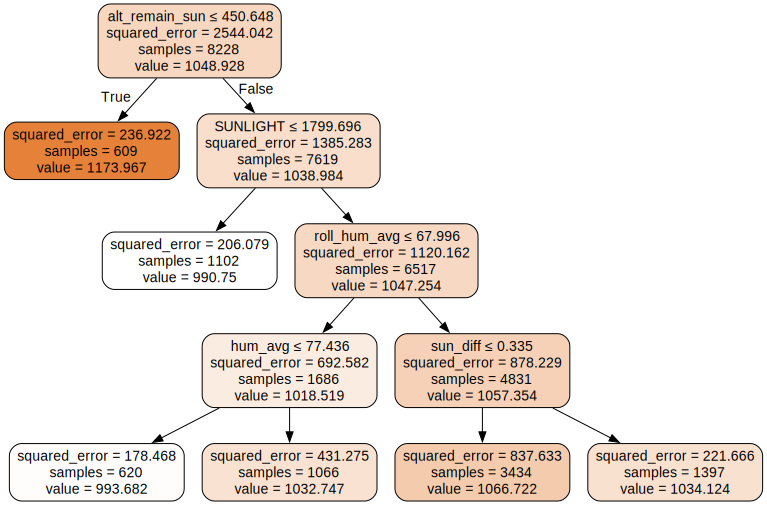

In [318]:
# Assuming 'forest_reg' is your trained Random Forest Regressor
# Visualize the first tree from the random forest
estimator = forest_reg.estimators_[0]

dot_data_rf = export_graphviz(estimator, out_file=None,
                              feature_names=X_train.columns,
                              class_names=['ORCHIDS'],
                              filled=True, rounded=True,
                              special_characters=True)
graph_rf = graphviz.Source(dot_data_rf)
graph_rf.render("random_forest_tree_lag")  # This saves the tree visualization to a file
graph_rf

In [319]:
prices_0.head(50)

,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY
0,0,0,1111.75,1.5,10.5,-2.0,4500.0000,95.000000
1,0,100,1111.75,1.5,10.5,-2.0,4500.0356,94.995990
2,0,200,1109.75,1.5,10.5,-2.0,4500.0700,94.991980
3,0,300,1109.25,1.5,10.5,-2.0,4500.1016,94.987970
4,0,400,1110.75,1.5,10.5,-2.0,4500.1313,94.983950
5,0,500,1110.75,1.5,10.5,-2.0,4500.1590,94.979935
6,0,600,1110.25,1.5,10.5,-2.0,4500.1850,94.975914
7,0,700,1110.25,1.5,10.5,-2.0,4500.2090,94.971890
8,0,800,1110.00,1.5,10.5,-2.0,4500.2305,94.967870
9,0,900,1111.75,1.5,10.5,-2.0,4500.2505,94.963844


In [320]:
print(orchids_cleaned.describe())

                day       timestamp       ORCHIDS  TRANSPORT_FEES  \
count  16273.000000    16273.000000  16273.000000    16273.000000   
mean       0.386591   615559.085602   1048.599213        1.148547   
std        0.637206   236783.880297     50.619076        0.307711   
min       -1.000000      100.000000    960.750000        0.700000   
25%        0.000000   449500.000000   1016.750000        0.900000   
50%        0.000000   645300.000000   1041.750000        1.100000   
75%        1.000000   796600.000000   1070.750000        1.400000   
max        1.000000  1000000.000000   1215.750000        2.100000   

       EXPORT_TARIFF  IMPORT_TARIFF      SUNLIGHT      HUMIDITY  \
count   16273.000000   16273.000000  16273.000000  16273.000000   
mean        9.658238      -3.741019   2304.828740     71.586440   
std         1.371269       1.266196    651.229475      4.643130   
min         7.500000      -6.500000   1397.304900     60.000000   
25%         8.500000      -5.000000   1891.

C:\Users\axrpo\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\axrpo\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [321]:
print(orchids_cleaned1.describe())

                day       timestamp       ORCHIDS  TRANSPORT_FEES  \
count  13723.000000    13723.000000  13723.000000    13723.000000   
mean      -0.458427   363181.053705   1168.850579        1.341966   
std        0.767120   284786.955996     61.701881        0.219363   
min       -1.000000      100.000000   1013.250000        0.800000   
25%       -1.000000   142500.000000   1109.250000        1.200000   
50%       -1.000000   256900.000000   1199.750000        1.300000   
75%        0.000000   537650.000000   1217.750000        1.500000   
max        1.000000  1000000.000000   1257.250000        2.100000   

       EXPORT_TARIFF  IMPORT_TARIFF      SUNLIGHT      HUMIDITY  \
count   13723.000000   13723.000000  13723.000000  13723.000000   
mean        9.810938      -3.007112   3336.909758     87.950062   
std         1.360978       1.069276    859.507762      4.572251   
min         8.500000      -6.000000   1669.296600     59.999580   
25%         8.500000      -3.000000   2739.

C:\Users\axrpo\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [322]:
'''
# Plotting the histogram of 'sunlight_gamma'
plt.figure(figsize=(10, 6))  # Optional: Set the size of the figure
counts, bins, patches = plt.hist(orchids['sun_gamma'], bins=20, density=True, color='blue', alpha=0.6, edgecolor='black')
plt.title('Histogram of Sunlight Gamma')
plt.xlabel('Sunlight Gamma Values')
plt.ylabel('Frequency')

# Generate points on the x axis between the minimum and maximum values of histogram bins
x = np.linspace(min(bins), max(bins), 100)

# Calculate the normal distribution with mean = 0 and the computed standard deviation
y = norm.pdf(x, 0, std_dev)

# Overlay the normal distribution curve
plt.plot(x, y, 'r-', lw=2)  # 'r-' for a red line with linewidth of 2

# Show the plot
plt.show()
'''

"\n# Plotting the histogram of 'sunlight_gamma'\nplt.figure(figsize=(10, 6))  # Optional: Set the size of the figure\ncounts, bins, patches = plt.hist(orchids['sun_gamma'], bins=20, density=True, color='blue', alpha=0.6, edgecolor='black')\nplt.title('Histogram of Sunlight Gamma')\nplt.xlabel('Sunlight Gamma Values')\nplt.ylabel('Frequency')\n\n# Generate points on the x axis between the minimum and maximum values of histogram bins\nx = np.linspace(min(bins), max(bins), 100)\n\n# Calculate the normal distribution with mean = 0 and the computed standard deviation\ny = norm.pdf(x, 0, std_dev)\n\n# Overlay the normal distribution curve\nplt.plot(x, y, 'r-', lw=2)  # 'r-' for a red line with linewidth of 2\n\n# Show the plot\nplt.show()\n"

In [323]:
'''
# Order defines how many points on each side to use for the comparison to consider comparator(n, n+x)
order = 5000

# Find indices of local maxima and minima
maxima_sun = argrelextrema(orchids['SUNLIGHT'].values, np.greater, order=order)[0]
minima_sun = argrelextrema(orchids['SUNLIGHT'].values, np.less, order=order)[0]
maxima_orchid = argrelextrema(orchids['ORCHIDS'].values, np.greater, order=order)[0]
minima_orchid = argrelextrema(orchids['ORCHIDS'].values, np.less, order=order)[0]

# Extract timestamps for these extrema
times_maxima_sun = orchids.loc[maxima_sun, 'new_timestamp']
times_minima_sun = orchids.loc[minima_sun, 'new_timestamp']
times_maxima_orchid = orchids.loc[maxima_orchid, 'new_timestamp']
times_minima_orchid = orchids.loc[minima_orchid, 'new_timestamp']

print(len(times_maxima_sun))
print(len(times_maxima_orchid))
print(len(times_minima_sun))
print(len(times_minima_orchid))
'''

"\n# Order defines how many points on each side to use for the comparison to consider comparator(n, n+x)\norder = 5000\n\n# Find indices of local maxima and minima\nmaxima_sun = argrelextrema(orchids['SUNLIGHT'].values, np.greater, order=order)[0]\nminima_sun = argrelextrema(orchids['SUNLIGHT'].values, np.less, order=order)[0]\nmaxima_orchid = argrelextrema(orchids['ORCHIDS'].values, np.greater, order=order)[0]\nminima_orchid = argrelextrema(orchids['ORCHIDS'].values, np.less, order=order)[0]\n\n# Extract timestamps for these extrema\ntimes_maxima_sun = orchids.loc[maxima_sun, 'new_timestamp']\ntimes_minima_sun = orchids.loc[minima_sun, 'new_timestamp']\ntimes_maxima_orchid = orchids.loc[maxima_orchid, 'new_timestamp']\ntimes_minima_orchid = orchids.loc[minima_orchid, 'new_timestamp']\n\nprint(len(times_maxima_sun))\nprint(len(times_maxima_orchid))\nprint(len(times_minima_sun))\nprint(len(times_minima_orchid))\n"

In [324]:
# times_maxima_sun/1000000

In [325]:
# times_maxima_orchid/1000000

In [326]:
# times_minima_sun

In [327]:
# times_minima_orchid

In [328]:
# prices_neg1.iloc[-1]